##### this module to generate trainning data for auto encoder
## We need high resoluion and low resolution image 

data set is taken from below 
https://www.kaggle.com/alxmamaev/flowers-recognition/version/2

In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline
import glob
import cv2
import numpy as np


In [2]:
def gaussiand_2_level_pyramid(img,kernal_size):
    
    blur_1 = cv2.GaussianBlur(img,(kernal_size,kernal_size),0)
    [h,w,c]  = blur_1.shape
    ## down_sample the blur1 and apply gaussian again 
    d_blur_1 = cv2.resize(blur_1, (0,0), fx=0.5, fy=0.5) 
    d_blur_2 = cv2.GaussianBlur(d_blur_1,(kernal_size,kernal_size),0)
    ## upsample image 
    blur_2 = cv2.resize(d_blur_2,(h,w),0,0, interpolation = cv2.INTER_NEAREST)
    return blur_1, blur_2

In [3]:
def NLSS_serach_low_resolution(img_gray,patch_size,kernal_size,newX,newY,path_out_LR,count2):
    ## apply bicubic interpolation 
    img_gray_scale = cv2.resize(img_gray,(int(newX),int(newY)), interpolation = cv2.INTER_CUBIC)
    
    [h,w,c] = img_gray_scale.shape
    
    print(h,w)
    out_img = np.zeros([2*h,2*w,c],dtype='float')
    overalp_size = round(patch_size/2)
    
    i = 0
    for row in range (0,h-patch_size,overalp_size):
        j = 0
        for col in range (0,w-patch_size,overalp_size):
            
            patch = img_gray_scale [row:row+patch_size,col:col+patch_size]
            ## apply blur in pathand perform down sampling 
            blur_1, blur_2 = gaussiand_2_level_pyramid(patch,kernal_size)
            mean_patch = blur_1/2.0 + blur_2/2.0        ## averaging instead of gaussina
            cv2.imwrite(path_out_LR+str(count2)+'.jpg', mean_patch)
            #mean_patch.shape
            #out_img[row:row+path_size,col:col+path_size] = mean_patch
            #out_img[i:i+patch_size,j:j+patch_size] = mean_patch
            count2 =count2+1
            j = j+patch_size
        i = i+patch_size    
    return count2

In [4]:
def write_high_resolution_patch(img_gray_scale,patch_size,path_out_SR,count1):
    ## apply bicubic interpolation 
    
    [h1,w1,c] = img_gray_scale.shape
    
    out_img = np.zeros([2*h1,2*w1,c],dtype='float')
    overalp_size = round(patch_size/2)
    
    i = 0
    for row in range (0,h1-patch_size,overalp_size):
        j = 0
        for col in range (0,w1-patch_size,overalp_size):
            
            patch = img_gray_scale [row:row+patch_size,col:col+patch_size]
            ## apply blur in pathand perform down sampling 
            #blur_1, blur_2 = gaussiand_2_level_pyramid(patch,kernal_size)
            #mean_patch = blur_1/2.0 + blur_2/2.0        ## averaging instead of gaussina
            
            #mean_patch.shape
            #out_img[row:row+path_size,col:col+path_size] = mean_patch
            #out_img[i:i+patch_size,j:j+patch_size] = mean_patch
            cv2.imwrite(path_out_SR+str(count1)+'.jpg',patch)
            count1 = count1+1
            j = j+patch_size
        i = i+patch_size    
    return count1

In [5]:
## read_high resolution image 


#path = '/home/lord/cv_assignment/cv_project/data_set/images/train/*.jpg'

#path_out_SR = '/home/lord/cv_assignment/cv_project/data_set/NLSS_data_set/train/SR/'
#path_out_LR = '/home/lord/cv_assignment/cv_project/data_set/NLSS_data_set/train/LR/'

path = '/home/lord/cv_assignment/cv_project/data_set/images/train1/*.jpg'

path_out_SR = '/home/lord/cv_assignment/cv_project/data_set/NLSS_data_set/test/SR/'
path_out_LR = '/home/lord/cv_assignment/cv_project/data_set/NLSS_data_set/test/LR/'

patch_size = 8      # 56
kernal_size = 3     # 5
count1 = 0
count2 = 0
for img_path in glob.glob(path):
    
    img= cv2.imread(img_path)
    [h2,w2,c2] = img.shape
    
    img_L = cv2.resize(img,(0,0),fx=.73,fy=.73, interpolation = cv2.INTER_CUBIC)
    
    count1 = write_high_resolution_patch(img,patch_size,path_out_SR, count1)
    count2 = NLSS_serach_low_resolution(img_L,patch_size,kernal_size,w2,h2,path_out_LR,count2)
    print(count1,count2)
    if(count1==count2):
        print("ok")
    else:
        print("error in training")
        break
    

225 320
4290 4290
ok
280 320
9594 9594
ok
375 500
20910 20910
ok
240 221
24042 24042
ok
333 500
34128 34128
ok
288 465
42178 42178
ok
240 230
45426 45426
ok
240 240
48790 48790
ok
256 320
53626 53626
ok
240 320
58150 58150
ok
332 500
68113 68113
ok
334 500
78199 78199
ok
332 500
88162 88162
ok
375 500
99478 99478
ok
240 320
104002 104002
ok
240 320
108526 108526
ok
237 320
113050 113050
ok
334 500
123136 123136
ok
220 320
127270 127270
ok
213 320
131326 131326
ok
333 500
141412 141412
ok
213 320
145468 145468
ok
375 500
156784 156784
ok
398 500
168838 168838
ok
385 500
180523 180523
ok
213 320
184579 184579
ok
375 500
195895 195895
ok
391 500
207703 207703
ok
240 320
212227 212227
ok
332 500
222190 222190
ok
240 180
224684 224684
ok
239 320
229208 229208
ok
240 240
232572 232572
ok
218 320
236706 236706
ok
333 500
246792 246792
ok
240 320
251316 251316
ok
335 500
261402 261402
ok
219 240
264476 264476
ok
240 320
269000 269000
ok
346 500
279455 279455
ok
240 180
281949 281949
ok
333 500

In [6]:
%whos

Variable                      Type        Data/Info
---------------------------------------------------
Image                         type        <class 'IPython.core.display.Image'>
NLSS_serach_low_resolution    function    <function NLSS_serach_low<...>lution at 0x7fcc72787a60>
SVG                           type        <class 'IPython.core.display.SVG'>
c2                            int         3
count1                        int         427787
count2                        int         427787
cv2                           module      <module 'cv2' from '/home<...>36m-x86_64-linux-gnu.so'>
gaussiand_2_level_pyramid     function    <function gaussiand_2_lev<...>yramid at 0x7fcc8558b950>
glob                          module      <module 'glob' from '/hom<...>3/lib/python3.6/glob.py'>
h2                            int         240
img                           ndarray     240x240x3: 172800 elems, type `uint8`, 172800 bytes (168.75 kb)
img_L                         ndarray     175x175x3: 9

In [7]:
1/.7


1.4285714285714286

In [8]:
1/.75

1.3333333333333333

In [9]:
1/.72

1.3888888888888888

In [10]:
def write_high_resolution_patch_test(img_gray_scale,patch_size):
    ## apply bicubic interpolation 
    
    [h1,w1,c] = img_gray_scale.shape
    
    out_img = np.zeros([2*h1,2*w1,c],dtype='float')
    out_img1 = np.zeros([h1,w1,c],dtype='float')
    overalp_size = round(patch_size/2)
    
    i = 0
    for row in range (0,h1-patch_size,overalp_size):
        j = 0
        for col in range (0,w1-patch_size,overalp_size):
            
            patch = img_gray_scale [row:row+patch_size,col:col+patch_size]
            ## apply blur in pathand perform down sampling 
            #blur_1, blur_2 = gaussiand_2_level_pyramid(patch,kernal_size)
            #mean_patch = blur_1/2.0 + blur_2/2.0        ## averaging instead of gaussina
            
            #mean_patch.shape
            #out_img[row:row+path_size,col:col+path_size] = mean_patch
            #out_img[i:i+patch_size,j:j+patch_size] = mean_patch
            #cv2.imwrite(path_out_SR+str(count1)+'.jpg',patch)
            out_img1[row:row+patch_size,col:col+patch_size] = out_img1 [row:row+patch_size,col:col+patch_size]/2.0 + patch/2.0
            
            j = j+patch_size
        i = i+patch_size    
    return out_img1

In [11]:
#### this for testing 

patch_size = 56
count1 = 0
img = cv2.imread('/home/lord/cv_assignment/cv_project/data_set/images/train/5547758_eea9edfd54_n.jpg')
out_img1 = write_high_resolution_patch_test(img,patch_size)

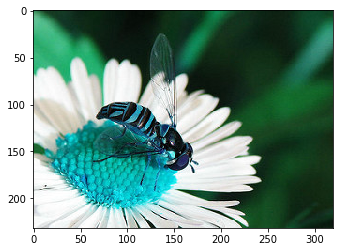

In [12]:
plt.imshow(img)
plt.gray()

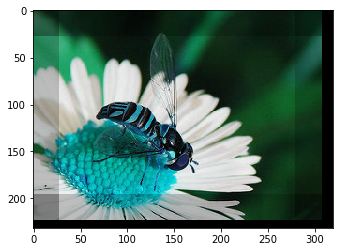

In [13]:
plt.imshow(out_img1.astype('uint8'))
plt.gray()

In [14]:
1/.73

1.36986301369863